## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings("ignore")

## Import  Files

In [3]:
#the description file
description = pd.read_csv("Airbnb Data/Listings_data_dictionary.csv")
description

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [4]:
#the review file
reviews = pd.read_csv("Airbnb Data/Reviews.csv")
reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [5]:
# the host listing df
airbnb_df = pd.read_csv("Airbnb Data/Listings.csv", encoding= "ISO-8859-1")
pd.set_option('display.max_columns', None) #display all the columns
airbnb_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Exploring the Dataframe

In [6]:
airbnb_df["city"].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [8]:
airbnb_df['room_type'].value_counts()

Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: room_type, dtype: int64

In [9]:
airbnb_df['host_location'].value_counts()

Paris, Ile-de-France, France                           47794
New York, New York, United States                      24040
Rome, Lazio, Italy                                     20138
Cape Town, Western Cape, South Africa                  13602
Rio de Janeiro, State of Rio de Janeiro, Brazil        13211
                                                       ...  
Niort, Poitou-Charentes, France                            1
Gloversville, New York, United States                      1
Rangsit, Pathum Thani, Thailand                            1
Ozumba de Alzate, Estado de Mexico, Mexico                 1
BrasÃÂ­lia de Minas, State of Minas Gerais, Brazil        1
Name: host_location, Length: 7159, dtype: int64

In [10]:
airbnb_df['amenities'].value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                               1388
["Long term stays allowed", "Iron", "Air conditioning", "Wifi", "Kitchen"]                                                                                                                                                                                                                                                                                                                 376
[]                                                                                                                                                                                                                                        

In [11]:
airbnb_df['property_type'].value_counts()

Entire apartment                138989
Private room in apartment        47322
Private room in house            13292
Entire house                     13273
Entire condominium               11250
                                 ...  
Shared room in floor                 1
Shared room in parking space         1
Shared room in tent                  1
Train                                1
Tipi                                 1
Name: property_type, Length: 144, dtype: int64

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

## Check Null Values

In [13]:
airbnb_df.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [14]:
airbnb_df.isnull().sum().sum()

1286425

## Check duplicates

In [15]:
airbnb_df = airbnb_df.drop_duplicates()
airbnb_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Convert the local currency to Euros

In [16]:
airbnb_df['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

### conversion rates to euros (11.05.2022)
- Dollars  = 0.95 (New York)
- Thai baht = 0.027 (Bangkok)
- South African Rand = 0.059 (Cape Town)
- Hong Kong Dollar = 0.12 (Hong Kong)
- Turkish Lira = 0.062 (Istanbul)
- Mexican Peso = 0.047 (Mexico city)
- Brazilian Real = 0.19 (Rio de Janeiro)
- Australian Dollars = 0.66 (Sydney)

In [17]:
airbnb_df['price_in_euro'] = np.where(airbnb_df['city'] == 'New York' , airbnb_df['price'] * 0.95,
                            (np.where(airbnb_df['city'] == 'Bangkok' , airbnb_df['price'] * 0.027,
                            (np.where(airbnb_df['city'] == 'Cape Town' , airbnb_df['price'] * 0.059,
                            (np.where(airbnb_df['city'] == 'Hong Kong' , airbnb_df['price'] * 0.12,
                            (np.where(airbnb_df['city'] == 'Istanbul' , airbnb_df['price'] * 0.062,
                            (np.where(airbnb_df['city'] == 'Mexico City' , airbnb_df['price'] * 0.047,
                            (np.where(airbnb_df['city'] == 'Rio de Janeiro' , airbnb_df['price'] * 0.19,
                            (np.where(airbnb_df['city'] == 'Sydney' , airbnb_df['price'] * 0.66,  airbnb_df['price'] * 1)))))))))))))))

In [18]:
country_group = airbnb_df.groupby(['city'])
country_group.get_group("Mexico City")

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_in_euro
11875,17192399,Luxury apartment Santa Fe,47108652,2015-10-21,"Mexico City, Federal District, Mexico",NaN,NaN,0.90,f,1.0,t,t,Alvaro Obregon,NaN,Mexico City,19.37410,-99.24530,Entire apartment,Entire place,6,3.0,"[""Garden or backyard"", ""TV"", ""Dryer"", ""Extra p...",2499,3,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,117.453
11876,23884039,Lindo y acogedor departamento en PB,49851026,2015-11-25,"Taoyuan City, Taiwan",NaN,NaN,0.50,t,1.0,t,t,Coyoacan,NaN,Mexico City,19.33708,-99.16157,Entire apartment,Entire place,6,3.0,"[""Garden or backyard"", ""TV"", ""Dedicated worksp...",1300,2,1125,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,61.100
11904,11609716,2 BEDROOMS 2 BATHROOMS LONG TERM STAYS,61453241,2016-03-03,"Mexico City, Federal District, Mexico",NaN,NaN,0.67,f,1.0,t,f,Benito Juarez,NaN,Mexico City,19.38594,-99.15725,Entire apartment,Entire place,4,2.0,"[""TV"", ""Dedicated workspace"", ""Washer \u2013\u...",850,5,1125,80.0,9.0,8.0,8.0,9.0,10.0,8.0,f,39.950
11905,41107177,Apartamento entero en Roma Norte CDMX,26745349,2015-01-26,"Mexico City, Mexico City, Mexico",NaN,NaN,0.80,t,1.0,t,t,Cuauhtemoc,NaN,Mexico City,19.41732,-99.15780,Entire apartment,Entire place,4,2.0,"[""Washer"", ""TV"", ""Dedicated workspace"", ""Free ...",1124,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,52.828
11937,16948016,"Roma Condesa, 1 espacioso, iluminado y calientito",113311094,2017-01-25,"Ciudad de Mexico, Ciudad de Mexico, Mexico",NaN,NaN,0.80,f,1.0,t,t,Cuauhtemoc,NaN,Mexico City,19.40799,-99.16730,Entire apartment,Entire place,6,2.0,"[""TV"", ""Dedicated workspace"", ""Dryer"", ""Extra ...",1213,3,1125,89.0,9.0,10.0,10.0,10.0,10.0,10.0,f,57.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268595,34650108,TU ESPACIO!,229289453,2018-12-05,"Ciudad de Mexico, Ciudad de Mexico, Mexico",within an hour,0.90,1.00,f,1.0,t,f,Benito Juarez,NaN,Mexico City,19.39384,-99.15960,Entire apartment,Entire place,2,1.0,"[""TV"", ""Free street parking"", ""Shampoo"", ""Esse...",379,2,120,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,17.813
268701,13979143,Eco & Cozzy apartment very near la Condesa,28347866,2015-02-25,"Mexico City, Federal District, Mexico",within a day,0.50,1.00,t,1.0,t,t,Miguel Hidalgo,NaN,Mexico City,19.40400,-99.17907,Entire apartment,Entire place,2,1.0,"[""Dedicated workspace"", ""Free street parking"",...",600,3,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,28.200
268702,31495094,Magnifico Lomas De Chapultepec a pasos de Palmas,155202296,2017-10-19,"Mexico City, Mexico City, Mexico",within a day,0.67,1.00,f,1.0,t,f,Miguel Hidalgo,NaN,Mexico City,19.42820,-99.21497,Entire apartment,Entire place,2,1.0,"[""Dedicated workspace"", ""TV"", ""Free parking on...",1300,3,90,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,61.100
268703,32282918,TLALPAN CENTRO / ZONA DE HOSPITALES,242299251,2019-02-10,"Mexico City, Mexico City, Mexico",a few days or more,0.00,0.00,f,1.0,t,f,Tlalpan,NaN,Mexico City,19.28741,-99.16172,Entire apartment,Entire place,2,1.0,"[""TV"", ""Dedicated workspace"", ""Shampoo"", ""Esse...",600,3,180,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,28.200


In [19]:
airbnb_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_in_euro
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,53.0
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,89.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,58.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,50.0
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,105.0


In [22]:
airbnb_df.to_csv("Airbnb with Price conversion.csv")

##  Extract the the Amenities List

In [20]:
airbnb_df['amenities'].value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                               1388
["Long term stays allowed", "Iron", "Air conditioning", "Wifi", "Kitchen"]                                                                                                                                                                                                                                                                                                                 376
[]                                                                                                                                                                                                                                        

## Using eval function

https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

- Eval function evaluates the string expression and returns its value (it recognizes the components as seperate list objects and strips the ("") qutation marks

-  if the list components are not in quotation marks,(eval) function doesn't work on them, so we need to loop through the list adding ("") in order for the components to be recognized as a list object

-  in our case we use eval without looping

In [21]:
airbnb_df["amenities"] = airbnb_df["amenities"].apply(eval)

In [22]:
#def add_quotes(list_):
    #list_ = list_.replace(', ', '","')
    #list_ = list_.replace('[', '["')
    #list_ = list_.replace(']', '"]')
    #return list_

In [23]:
#airbnb_df["amenities"] = airbnb_df["amenities"].apply(add_quotes)

In [24]:
airbnb_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_in_euro
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[Heating, Kitchen, Washer, Wifi, Long term sta...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,53.0
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[Shampoo, Heating, Kitchen, Essentials, Washer...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Washer, Wifi, Long term...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,89.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Wifi, Long term stays a...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,58.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Essentials, Hair dryer,...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[Iron, Heating, Washer, Dedicated workspace, E...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[Shampoo, Iron, Heating, Washer, Hair dryer, E...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[Paid parking off premises, Shampoo, First aid...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,50.0
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,105.0


## Convert the list to 1 dimension array

- If we conceptualize the amenities column as a 2D array, reducing its dimensions from 2 to 1 would allow us to apply the typical pandas functions again. 

In [25]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [26]:
to_1D(airbnb_df["amenities"]).value_counts()

Wifi                                                                          260090
Essentials                                                                    253532
Long term stays allowed                                                       241054
Kitchen                                                                       240923
TV                                                                            213037
                                                                               ...  
Fridgedare stainless steel gas stove                                               1
Frigedare stainless steel oven                                                     1
Fridgedare Stainless Steel refrigerator                                            1
HDTV with Amazon Prime Video, Apple TV, Chromecast, HBO Max, Netflix, Roku         1
Gautier Bluetooth sound system                                                     1
Length: 3446, dtype: int64

In [27]:
airbnb_df['amenities']

0         [Heating, Kitchen, Washer, Wifi, Long term sta...
1         [Shampoo, Heating, Kitchen, Essentials, Washer...
2         [Heating, TV, Kitchen, Washer, Wifi, Long term...
3         [Heating, TV, Kitchen, Wifi, Long term stays a...
4         [Heating, TV, Kitchen, Essentials, Hair dryer,...
                                ...                        
279707    [Iron, Heating, Washer, Dedicated workspace, E...
279708    [Shampoo, Iron, Heating, Washer, Hair dryer, E...
279709    [Paid parking off premises, Shampoo, First aid...
279710    [TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...
279711    [Shower gel, Shampoo, Iron, Heating, Washer, D...
Name: amenities, Length: 279712, dtype: object

### The top 20 Amenities listed by Hosts

In [29]:
to_1D(airbnb_df['amenities']).value_counts().nlargest(20)

Wifi                       260090
Essentials                 253532
Long term stays allowed    241054
Kitchen                    240923
TV                         213037
Hangers                    211356
Hair dryer                 188724
Iron                       187756
Washer                     185073
Heating                    184327
Dedicated workspace        179267
Shampoo                    174082
Hot water                  165163
Smoke alarm                156467
Air conditioning           142693
Dishes and silverware      123394
Refrigerator               123259
Cooking basics             110255
Elevator                   101582
Bed linens                 100486
dtype: int64

## Visualizing the most important amenities

Text(0.5, 1.0, 'Airbnb important Amenities')

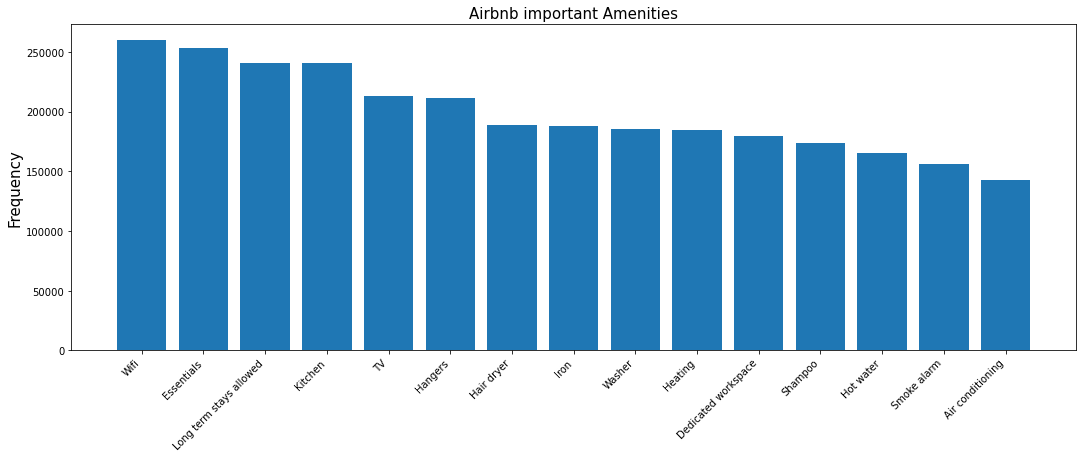

In [30]:
import matplotlib as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,6))
ax.bar(to_1D(airbnb_df['amenities']).value_counts().nlargest(15).index,
        to_1D(airbnb_df['amenities']).value_counts().nlargest(15).values)
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Frequency", size = 15)
ax.set_title("Airbnb important Amenities", size = 15)

In [31]:
to_1D(airbnb_df['amenities']).value_counts().nlargest(20).values

array([260090, 253532, 241054, 240923, 213037, 211356, 188724, 187756,
       185073, 184327, 179267, 174082, 165163, 156467, 142693, 123394,
       123259, 110255, 101582, 100486])

In [32]:
amenities = pd.DataFrame(to_1D(airbnb_df['amenities']).value_counts().nlargest(20))

In [170]:
amenities.to_csv("amenities.csv")

In [33]:
amenities

,0
Wifi,260090
Essentials,253532
Long term stays allowed,241054
Kitchen,240923
TV,213037
Hangers,211356
Hair dryer,188724
Iron,187756
Washer,185073
Heating,184327


## Checking the max number of nights 

In [171]:
airbnb_df['maximum_nights'].value_counts()

1125    157596
30       20449
365      15659
90        8165
60        6368
         ...  
728          1
285          1
495          1
2800         1
517          1
Name: maximum_nights, Length: 508, dtype: int64

## Checking the Neighbourhood

In [34]:
city_group = airbnb_df.groupby(['city'])
city_group.get_group("Paris")["neighbourhood"].value_counts()

Buttes-Montmartre      7237
Popincourt             6206
Vaugirard              4826
Enclos-St-Laurent      4628
Batignolles-Monceau    4330
Menilmontant           3758
Buttes-Chaumont        3728
Passy                  3215
Opera                  3157
Temple                 2943
Reuilly                2654
Observatoire           2485
Gobelins               2278
Bourse                 2188
Pantheon               2140
Luxembourg             1998
Hotel-de-Ville         1972
Palais-Bourbon         1771
Elysee                 1768
Louvre                 1408
Name: neighbourhood, dtype: int64

## Checking the minimum nights per room type

In [60]:
airbnb_df.groupby('room_type')['minimum_nights'].value_counts().nlargest(7)

room_type     minimum_nights
Entire place  2                 45242
              1                 42970
Private room  1                 41829
Entire place  3                 30607
              30                16277
Private room  2                 14747
              30                12011
Name: minimum_nights, dtype: int64

## Create a new column with airbnb count/Sqkm

### Create a new df with the sum of airbnbs in each city

In [61]:
 airbnb_df["city"].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [62]:
airbnb_df["city"].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [77]:
airbnb_count = airbnb_df["city"].value_counts().rename_axis('city').reset_index(name='count')
airbnb_count

,city,count
0,Paris,64690
1,New York,37012
2,Sydney,33630
3,Rome,27647
4,Rio de Janeiro,26615
5,Istanbul,24519
6,Mexico City,20065
7,Bangkok,19361
8,Cape Town,19086
9,Hong Kong,7087


### Sqkm of each city
- New York = 783.8 Sqkm
- Bangkok = 1569 Sqkm
- Cape Town = 2446 SqKm
- Hong Kong = 1106 SqKm
- Istanbul = 5343 SqKm
- Mexico city = 1485 SqKm
- Rio de Janeiro = 1200 SqKm
- Sydney = 12368 SqKm
- Paris = 105.4 SqKm
- Rome = 1285 SqKm

In [83]:
airbnb_count['count_per_Sqkm'] = np.where(airbnb_count['city'] == 'New York' , airbnb_count['count'] /783.8,
                                (np.where(airbnb_count['city'] == 'Bangkok' , airbnb_count['count'] / 1569,
                                (np.where(airbnb_count['city'] == 'Cape Town' , airbnb_count['count'] / 2446,
                                (np.where(airbnb_count['city'] == 'Hong Kong' , airbnb_count['count'] / 1106,
                                (np.where(airbnb_count['city'] == 'Istanbul' , airbnb_count['count'] / 5343,
                                (np.where(airbnb_count['city'] == 'Mexico City' , airbnb_count['count'] / 1485,
                                (np.where(airbnb_count['city'] == 'Rio de Janeiro' , airbnb_count['count'] / 1200,
                                (np.where(airbnb_count['city'] == 'Sydney' , airbnb_count['count'] / 12368,
                                (np.where(airbnb_count['city'] == 'Paris' , airbnb_count['count'] /105.4, 
                                airbnb_count['count'] / 1285)))))))))))))))))

In [84]:
airbnb_count

,city,count,count_per_Sqkm
0,Paris,64690,613.757116
1,New York,37012,47.221230
2,Sydney,33630,2.719114
3,Rome,27647,21.515175
4,Rio de Janeiro,26615,22.179167
5,Istanbul,24519,4.588995
6,Mexico City,20065,13.511785
7,Bangkok,19361,12.339707
8,Cape Town,19086,7.802944
9,Hong Kong,7087,6.407776


#### Convert float to integer

In [85]:
airbnb_count['count_per_Sqkm'].astype(int)

0    613
1     47
2      2
3     21
4     22
5      4
6     13
7     12
8      7
9      6
Name: count_per_Sqkm, dtype: int64

In [87]:
airbnb_count['count_per_Sqkm'] = airbnb_count['count_per_Sqkm'].astype(int)
airbnb_count

,city,count,count_per_Sqkm
0,Paris,64690,613
1,New York,37012,47
2,Sydney,33630,2
3,Rome,27647,21
4,Rio de Janeiro,26615,22
5,Istanbul,24519,4
6,Mexico City,20065,13
7,Bangkok,19361,12
8,Cape Town,19086,7
9,Hong Kong,7087,6


## Modeling

In [174]:
airbnb_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_in_euro
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[Heating, Kitchen, Washer, Wifi, Long term sta...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,53.0
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[Shampoo, Heating, Kitchen, Essentials, Washer...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Washer, Wifi, Long term...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,89.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Wifi, Long term stays a...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,58.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[Heating, TV, Kitchen, Essentials, Hair dryer,...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[Iron, Heating, Washer, Dedicated workspace, E...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,120.0
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[Shampoo, Iron, Heating, Washer, Hair dryer, E...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,60.0
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[Paid parking off premises, Shampoo, First aid...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,50.0
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,105.0


In [40]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279712 entries, 0 to 279711
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Drop unnecessary columns

In [177]:
air_X = airbnb_df.drop(['listing_id','name', 'host_id', 'host_location', 'host_response_time', 'host_response_rate',
                        'host_acceptance_rate', 'neighbourhood', 'district', 'latitude', 'longitude', 'amenities', 
                       'price','instant_bookable', 'city' ], axis=1)



In [178]:
air_X

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_in_euro
0,2011-12-03,f,1.0,t,f,Entire apartment,Entire place,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,53.0
1,2013-11-29,f,1.0,t,t,Entire apartment,Entire place,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0
2,2014-07-31,f,1.0,t,f,Entire apartment,Entire place,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,89.0
3,2013-12-17,f,1.0,t,t,Entire apartment,Entire place,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,58.0
4,2014-12-14,f,1.0,t,f,Entire apartment,Entire place,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,2015-04-13,f,1.0,t,t,Entire apartment,Entire place,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0
279708,2013-11-27,f,1.0,t,t,Entire apartment,Entire place,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0
279709,2012-04-27,f,1.0,t,t,Entire apartment,Entire place,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0
279710,2015-07-16,f,1.0,t,t,Entire apartment,Entire place,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,105.0


### get numeric columns

In [179]:
numeric = air_X._get_numeric_data()
numeric

,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_in_euro
0,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,53.0
1,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0
2,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,89.0
3,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,58.0
4,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,1.0,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0
279708,1.0,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0
279709,1.0,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0
279710,1.0,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,105.0


### get categorical columns

In [180]:
categorical = air_X.select_dtypes(object)
categorical = categorical.drop('host_since', axis=1)
categorical = categorical.drop('property_type', axis=1)

In [181]:
categorical

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type
0,f,t,f,Entire place
1,f,t,t,Entire place
2,f,t,f,Entire place
3,f,t,t,Entire place
4,f,t,f,Entire place
...,...,...,...,...
279707,f,t,t,Entire place
279708,f,t,t,Entire place
279709,f,t,t,Entire place
279710,f,t,t,Entire place


### Convert categorical columns into dummies

In [182]:
categorical_dummies = pd.get_dummies(categorical, drop_first=True)
categorical_dummies

,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0
1,0,1,1,0,0,0
2,0,1,0,0,0,0
3,0,1,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
279707,0,1,1,0,0,0
279708,0,1,1,0,0,0
279709,0,1,1,0,0,0
279710,0,1,1,0,0,0


In [183]:
categorical_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279712 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   host_is_superhost_t       279712 non-null  uint8
 1   host_has_profile_pic_t    279712 non-null  uint8
 2   host_identity_verified_t  279712 non-null  uint8
 3   room_type_Hotel room      279712 non-null  uint8
 4   room_type_Private room    279712 non-null  uint8
 5   room_type_Shared room     279712 non-null  uint8
dtypes: uint8(6)
memory usage: 3.7 MB


### Concat numeric and categorical

In [184]:
whole_airbnb = pd.concat([numeric,categorical_dummies], axis=1)
whole_airbnb

,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_in_euro,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,53.0,0,1,0,0,0,0
1,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0,0,1,1,0,0,0
2,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,89.0,0,1,0,0,0,0
3,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,58.0,0,1,1,0,0,0
4,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,1.0,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0,0,1,1,0,0,0
279708,1.0,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,60.0,0,1,1,0,0,0
279709,1.0,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0,0,1,1,0,0,0
279710,1.0,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,105.0,0,1,1,0,0,0


### X and y split

In [185]:
X = whole_airbnb.drop('price_in_euro', axis=1)
y = whole_airbnb.price_in_euro

In [186]:
X

,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0
1,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0
2,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0
3,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0
4,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,1.0,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0
279708,1.0,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0
279709,1.0,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0
279710,1.0,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0


In [106]:
X.dropna()

,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Cape Town,city_Hong Kong,city_Istanbul,city_Mexico City,city_New York,city_Paris,city_Rio de Janeiro,city_Rome,city_Sydney,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,1.0,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
279708,1.0,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
279709,1.0,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
279710,1.0,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


- To solve the problem of this error: (Input contains NaN, infinity or a value too large for dtype('float64') while using Linear regression,
- use the following code

In [187]:
X.fillna(-99999, inplace=True)

In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279712 entries, 0 to 279711
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_total_listings_count    279712 non-null  float64
 1   accommodates                 279712 non-null  int64  
 2   bedrooms                     279712 non-null  float64
 3   minimum_nights               279712 non-null  int64  
 4   maximum_nights               279712 non-null  int64  
 5   review_scores_rating         279712 non-null  float64
 6   review_scores_accuracy       279712 non-null  float64
 7   review_scores_cleanliness    279712 non-null  float64
 8   review_scores_checkin        279712 non-null  float64
 9   review_scores_communication  279712 non-null  float64
 10  review_scores_location       279712 non-null  float64
 11  review_scores_value          279712 non-null  float64
 12  host_is_superhost_t          279712 non-null  uint8  
 13 

In [189]:
y

0          53.0
1         120.0
2          89.0
3          58.0
4          60.0
          ...  
279707    120.0
279708     60.0
279709     50.0
279710    105.0
279711     70.0
Name: price_in_euro, Length: 279712, dtype: float64

### Train and Test

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

### Scaling

In [191]:
std_scaler = StandardScaler().fit(X_train)  
X_train_scaled = std_scaler.transform(X_train)

X_train_scaled

array([[ 0.11918616, -1.07223987,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       [ 0.01772889, -0.60497742,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       [ 0.01695144,  0.32954749,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       ...,
       [ 0.01617399,  0.32954749,  0.34359556, ..., -0.14498379,
        -0.67158168, -0.13287525],
       [ 0.01617399, -0.60497742,  0.34356302, ..., -0.14498379,
        -0.67158168, -0.13287525],
       [ 0.01578526, -0.60497742,  0.34359556, ..., -0.14498379,
        -0.67158168, -0.13287525]])

In [192]:
X_test_scaled = std_scaler.transform(X_test)
X_test_scaled

array([[ 0.02122741, -0.60497742,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       [ 0.01617399, -0.60497742,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       [ 0.01617399,  2.1985973 ,  0.34359556, ..., -0.14498379,
        -0.67158168, -0.13287525],
       ...,
       [ 0.01695144,  2.1985973 ,  0.3436281 , ..., -0.14498379,
        -0.67158168, -0.13287525],
       [ 0.01656271, -0.60497742,  0.34356302, ..., -0.14498379,
         1.48902216, -0.13287525],
       [ 0.01656271,  0.79680994,  0.34359556, ..., -0.14498379,
        -0.67158168, -0.13287525]])

In [193]:
print(X_train.shape)
print()
print(X.columns)

(195798, 18)

Index(['host_total_listings_count', 'accommodates', 'bedrooms',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_is_superhost_t',
       'host_has_profile_pic_t', 'host_identity_verified_t',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


### Linear Regression

In [194]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [195]:
model.coef_

array([  2.53132615,  66.55603301,   1.5302733 ,   9.26239692,
         0.19853257,  -0.0757697 ,   1.96836347, -16.87076335,
        13.66950783,   0.46590439,  -5.11122613, -14.99263467,
        -3.21915088,  -1.65207364,   5.5932693 ,   3.83752697,
        -6.65050371,  -2.85558897])

In [196]:
model.intercept_

108.46025089122465

In [197]:
model.score(X_test,y_test)

-54324307.90599012

### Prediction

In [198]:
y_pred = model.predict(X_test)
y_pred

array([2.98201179e+02, 3.03770011e+02, 2.09548519e+06, ...,
       2.09556197e+06, 2.09514113e+06, 5.30085915e+02])

In [199]:
y_test

103188     26.550
101917     21.411
217507    304.000
172783     35.046
50497      47.500
           ...   
155068    251.940
146048     17.550
54145     325.470
111431     66.000
55979      80.000
Name: price_in_euro, Length: 83914, dtype: float64

### Residual Check

In [200]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
103188,26.550,2.982012e+02
101917,21.411,3.037700e+02
217507,304.000,2.095485e+06
172783,35.046,1.474058e+02
50497,47.500,3.380161e+02
...,...,...
155068,251.940,2.497207e+02
146048,17.550,2.095532e+06
54145,325.470,2.095562e+06
111431,66.000,2.095141e+06


### Visualise residuals

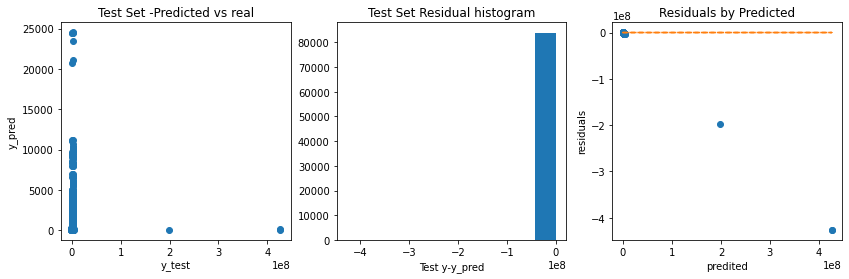

In [201]:
# scatter plot y_pred vs y
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# histogram of the residuals between y - y_pred. 
# Homoscdasticity
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Model Evaluation

In [202]:
# MSE - Mean Square Error
mse(y_test,y_pred)

6225169973444.131

In [203]:
# RMSE - Root Mean Square Error
mse(y_test, y_pred, squared=False)

2495029.052625266

In [204]:
# MAE - Mean Absolute Error
mae (y_test, y_pred)

706963.9777112562

In [205]:
# R2 - percentage of how good the model is
R2=r2_score(y_test,y_pred)
R2

-54324307.90599012

In [206]:
features_importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': abs(model.coef_)})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
1,accommodates,66.556033
7,review_scores_cleanliness,16.870763
11,review_scores_value,14.992635
8,review_scores_checkin,13.669508
3,minimum_nights,9.262397
16,room_type_Private room,6.650504
14,host_identity_verified_t,5.593269
10,review_scores_location,5.111226
15,room_type_Hotel room,3.837527
12,host_is_superhost_t,3.219151


In [207]:
numeric.corr()

,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_in_euro
host_total_listings_count,1.000000,-0.018868,-0.009910,-0.000161,-0.000303,-0.037162,-0.040658,-0.016856,-0.036414,-0.045739,-0.005259,-0.049027,0.034638
accommodates,-0.018868,1.000000,0.639102,-0.033442,0.003241,0.006420,-0.009308,0.007203,0.004743,-0.000910,0.008774,-0.023706,0.166974
bedrooms,-0.009910,0.639102,1.000000,-0.010582,0.000872,0.009007,-0.010811,0.002247,0.005562,-0.004753,0.008412,-0.019745,0.146985
minimum_nights,-0.000161,-0.033442,-0.010582,1.000000,0.000248,0.000143,-0.000529,-0.013915,-0.001112,-0.001204,-0.008982,-0.004731,0.013163
maximum_nights,-0.000303,0.003241,0.000872,0.000248,1.000000,-0.002795,-0.003251,-0.002943,-0.002934,-0.002895,0.000397,-0.003954,-0.000276
review_scores_rating,-0.037162,0.006420,0.009007,0.000143,-0.002795,1.000000,0.785838,0.740594,0.661642,0.709482,0.540717,0.782864,0.015589
review_scores_accuracy,-0.040658,-0.009308,-0.010811,-0.000529,-0.003251,0.785838,1.000000,0.647809,0.655795,0.682926,0.532866,0.717447,0.002458
review_scores_cleanliness,-0.016856,0.007203,0.002247,-0.013915,-0.002943,0.740594,0.647809,1.000000,0.525337,0.540806,0.430433,0.654149,0.013143
review_scores_checkin,-0.036414,0.004743,0.005562,-0.001112,-0.002934,0.661642,0.655795,0.525337,1.000000,0.736436,0.519118,0.595167,0.002574
review_scores_communication,-0.045739,-0.000910,-0.004753,-0.001204,-0.002895,0.709482,0.682926,0.540806,0.736436,1.000000,0.520654,0.634834,-0.000714


### Heatmap

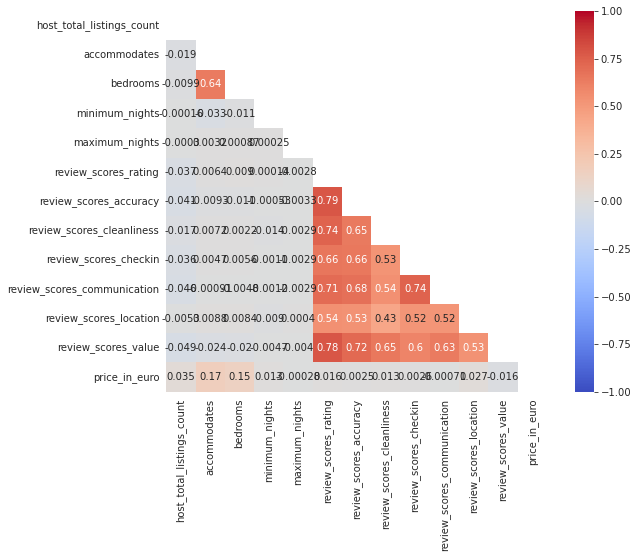

In [208]:
#Plot the Correlation Heatmap.
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(numeric.corr(), mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Mosts traveled days

In [209]:
reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [211]:
import datetime

In [212]:
reviews["date"] = pd.to_datetime(reviews["date"])

In [213]:
reviews['weekday'] = reviews['date'].dt.weekday

In [215]:
reviews['day_name'] = reviews['date'].dt.day_name()

In [216]:
reviews

,listing_id,review_id,date,reviewer_id,weekday,day_name
0,11798,330265172,2018-09-30,11863072,6,Sunday
1,15383,330103585,2018-09-30,39147453,6,Sunday
2,16455,329985788,2018-09-30,1125378,6,Sunday
3,17919,330016899,2018-09-30,172717984,6,Sunday
4,26827,329995638,2018-09-30,17542859,6,Sunday
...,...,...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516,0,Monday
5373139,47823964,727963021,2021-01-31,76411977,6,Sunday
5373140,47896175,728548625,2021-02-02,71370946,1,Tuesday
5373141,47900451,727399287,2021-01-29,109011160,4,Friday
